# Exploratory Analysis on Housing Data in Python

In [1]:
%matplotlib inline
import numpy as np
import requests
import pandas as pd
import seaborn as sns
import matplotlib as mat

sns.set(color_codes = True)

import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from ipynb.fs.full.Credentials import *

## Data Collection

In [2]:
api_key = Realtor_API_KEY_1

city = 'New York City'
state = 'NY'
prop_type = 'single_family'
radius = '1'

In [228]:
def getDataFromProperty(api_key, city, state, prop_type, radius):
    table = []
    url = "https://realtor.p.rapidapi.com/properties/v2/list-for-sale"

    querystring = {"city":city,
                   "limit":"200",
                   "offset":"0",
                   "beds_min":"1",
                   "baths_min":"1",
                   "sqft_min":"1",
                   "state_code":state,
                   "prop_type":prop_type,
                   "radius":radius}

    headers = {
        'x-rapidapi-key': api_key,
        'x-rapidapi-host': "realtor.p.rapidapi.com"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)

    for item in response.json()['properties']:
        item['city'] = item['address']['city']
        item['zipcode'] = item['address']['postal_code']
        item['state'] = item['address']['state_code']
        item['county'] = item['address']['county']
        item['longitude'] = item['address']['lon']
        item['latitude'] = item['address']['lat']
        item['combined_loc'] = item['city'] + ', ' + item['county'] + ', ' + item['state']
        item['size(sqft)'] = item['building_size']['size']
        data = pd.DataFrame.from_dict(item, orient = 'index').T
        row = data[['property_id', 'price', 'beds', 'baths','size(sqft)',
                    'city', 'county', 'state', 'zipcode', 'combined_loc', 'longitude', 'latitude', 'last_update']]
        
        table.append(row)
    
    table = pd.concat(table, axis = 0, ignore_index = True, sort = False)
    
    table['price'] = table['price'].astype(int)
    table['price'].describe().apply(lambda x: format(x, 'f'))
    table['size(sqft)'] = table['size(sqft)'].astype(int)
    table['size(sqft)'].describe().apply(lambda x: format(x, 'f'))
    table['longitude'] = table['longitude'].astype(float)
    table['latitude'] = table['latitude'].astype(float)
    table['last_update'] = pd.to_datetime(table['last_update'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')
        
    return table

In [229]:
Table = getDataFromProperty(api_key, city, state, prop_type, radius)
Table

,property_id,price,beds,baths,size(sqft),city,county,state,zipcode,combined_loc,longitude,latitude,last_update
0,M4275895907,899000,3,2,1152,Brooklyn,Kings,NY,11234,"Brooklyn, Kings, NY",-73.935891,40.619048,2021-02-03 16:51:50
1,M3158577841,649000,4,3,1764,Jamaica,Queens,NY,11433,"Jamaica, Queens, NY",-73.833159,40.681318,2021-02-03 16:28:15
2,M3710468076,639000,3,2,1300,Staten Island,Richmond,NY,10306,"Staten Island, Richmond, NY",-74.106337,40.565122,2021-02-03 15:05:17
3,M4325232958,1999999,5,6,7238,Staten Island,Richmond,NY,10312,"Staten Island, Richmond, NY",-74.167390,40.539639,2021-02-03 15:48:09
4,M4246425150,999000,4,3,2535,Bronx,Bronx,NY,10461,"Bronx, Bronx, NY",-73.850202,40.852136,2021-02-03 14:55:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,M4910358819,758000,3,4,1764,Staten Island,Richmond,NY,10310,"Staten Island, Richmond, NY",-74.113219,40.632288,2021-01-26 09:44:03
196,M4325252065,799995,3,2,1555,Bronx,Bronx,NY,10471,"Bronx, Bronx, NY",-73.897042,40.902854,2021-01-27 12:29:18
197,M3190270339,1758000,4,5,3900,Staten Island,Richmond,NY,10301,"Staten Island, Richmond, NY",-74.105040,40.603693,2021-01-29 13:23:08
198,M4097568161,699888,3,1,1400,New Hyde Park,Nassau,NY,11040,"New Hyde Park, Nassau, NY",-73.694990,40.735200,2021-01-26 09:07:23


## Exploratory Data Analysis

In [230]:
Table.info()
Table.describe().apply(lambda s: s.apply('{0:.2f}'.format))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
property_id     200 non-null object
price           200 non-null int32
beds            200 non-null object
baths           200 non-null object
size(sqft)      200 non-null int32
city            200 non-null object
county          200 non-null object
state           200 non-null object
zipcode         200 non-null object
combined_loc    200 non-null object
longitude       200 non-null float64
latitude        200 non-null float64
last_update     200 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 18.9+ KB


,price,size(sqft),longitude,latitude
count,200.00,200.00,200.00,200.00
mean,1008734.44,2046.98,-73.95,40.68
std,866382.31,1198.44,0.17,0.11
min,65000.00,840.00,-74.26,40.50
25%,599000.00,1292.00,-74.11,40.60
50%,750000.00,1753.50,-73.90,40.68
75%,1120000.00,2260.00,-73.82,40.75
max,8750000.00,7605.00,-73.69,40.92


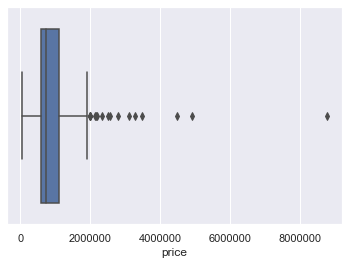

In [231]:
#Boxplot - price
sns.boxplot(x = Table['price'])

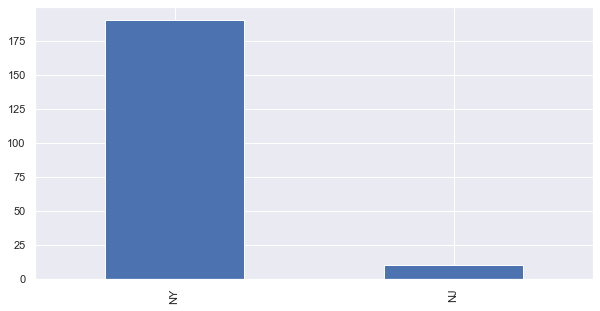

In [232]:
#Histogram - state
Table.state.value_counts().nlargest(40).plot(kind = 'bar', figsize=(10,5))

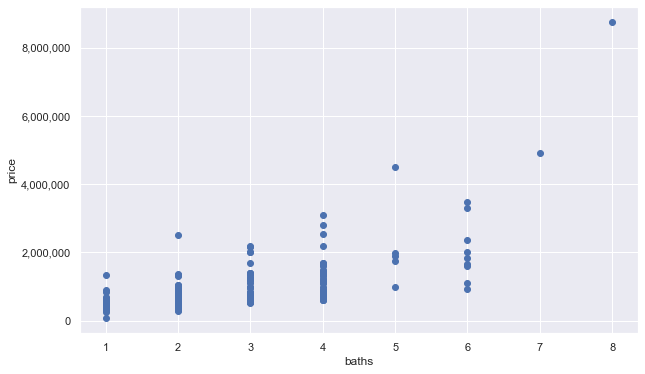

In [233]:
#Scatter plot - price, baths
fig, ax = mat.pyplot.subplots(figsize=(10,6))
ax.scatter(Table['baths'], Table['price'])
ax.get_yaxis().set_major_formatter(
mat.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('baths')
ax.set_ylabel('price')
mat.pyplot.show()

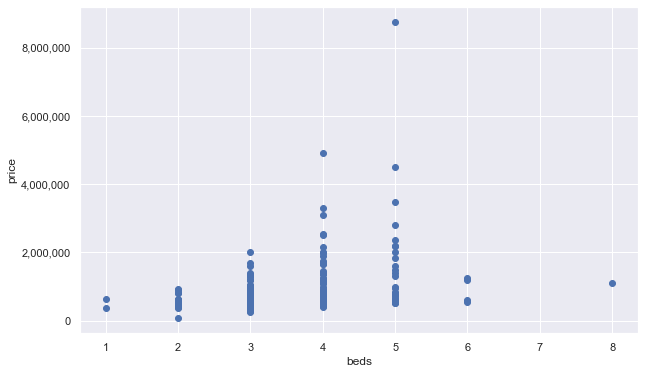

In [239]:
#Scatter plot - price, beds
fig, ax = mat.pyplot.subplots(figsize=(10,6))
ax.scatter(Table['beds'], Table['price'])
ax.get_yaxis().set_major_formatter(
mat.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('beds')
ax.set_ylabel('price')
mat.pyplot.show()

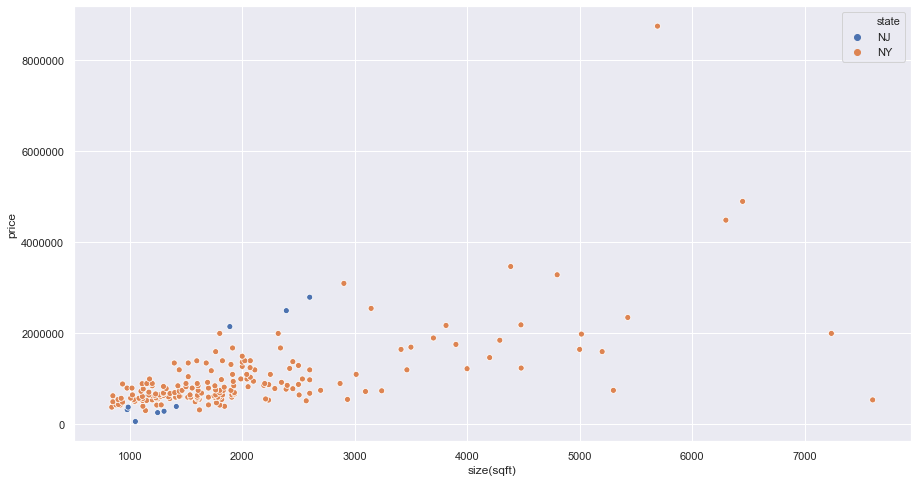

In [243]:
#Scatter plot - state, price, size(sqft)
sns.set(rc={'figure.figsize':(15,8)})
sns.scatterplot(x = "size(sqft)", y = "price", hue="state",
             data = Table.groupby(['state']).apply(lambda x: x.sort_values(by=['price'])))
mat.pyplot.show()

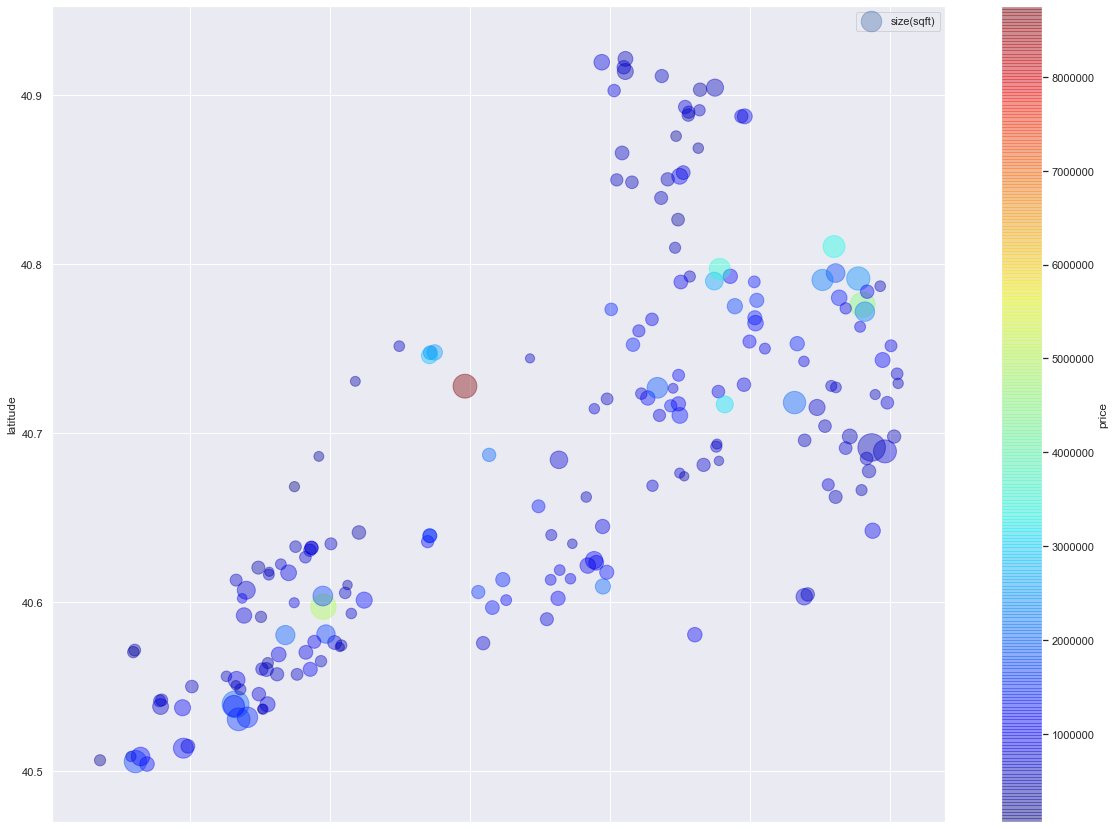

In [237]:
#Scatter plot - longitude, latitude, size(sqft), price
Table.plot(kind="scatter", x="longitude", y="latitude",
           s=Table['size(sqft)']/10, label="size(sqft)",
           c="price", cmap=mat.pyplot.get_cmap("jet"),
           colorbar=True, alpha=0.4, figsize=(20,15))
mat.pyplot.show()